| Experiment Name | Description | Parameters |
| :- | :- | :- |
| EXP01 |   Reference run as EXP00              | rnDt      = 2700.         |
| EXP02 |   Decreased time step for stability   | rnDt      = 900.          |    
| EXP03 |   Decreased wind forcing              | zTau0     = 5e-2          |
| EXP04 |   (Almost) Centered around equator    | rnPhi0    = -40           | 
| EXP05 |   Uniform zonal wind forcing          | nnforcing = 2             |
| EXP06 |   TEOS10                              | nnforcing = 2, TEOS10     |
| EXP07 |   No flattening of the bathymetry     | ln_equ_flat = False       |

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import cftime._cftime as cft
#import holoviews as hv

#hv.extension('bokeh')

In [17]:
def clean_coords(xrdataset, start_year):
    try:
        shift = cft.timedelta(days=360 * start_year)
        datetimeindex = (xrdataset.indexes['time_counter'] + shift).to_datetimeindex
    except:
        datetimeindex = xrdataset.indexes['time_counter']
    try:
        latitude  = xrdataset.nav_lat[:,0].values
        longitude = xrdataset.nav_lon[0,:].values
    except:
        latitude  = xrdataset.nav_lat_grid_T[:,0].values
        longitude = xrdataset.nav_lon_grid_T[0,:].values

    return xrdataset.assign_coords(dict({'time_counter':datetimeindex, 'y': latitude, 'x': longitude}))


# **EXP01: Reference Run**

In [56]:
U1       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP01/BASIN_grid_U.nc")
T1       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP01/BASIN_grid_T.nc")
mask1    = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP01/mesh_mask.nc")

In [57]:
T1 = clean_coords(T1, 2000)
U1 = clean_coords(U1, 2000)
mask1 = clean_coords(mask1, 2000)

## Bathymetry

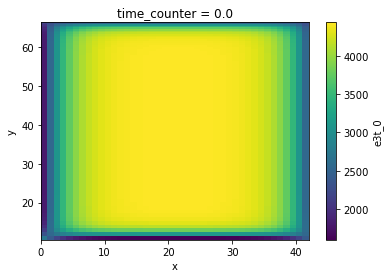

In [208]:
mask1.e3t_0.sum(dim='nav_lev').plot(x='x', y='y')

## Salinity

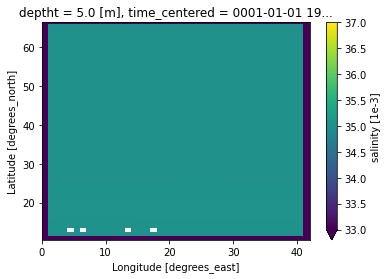

In [131]:
T1.soce.isel(deptht=0, time_counter=-2).plot(x='nav_lon_grid_T', y='nav_lat_grid_T', vmin=33, vmax=37)

## Zonal velocity

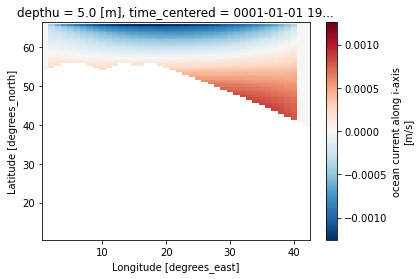

In [201]:
U1.uoce.isel(depthu=0, time_counter=-2).plot(x='nav_lon', y='nav_lat')


# **EXP02: Decreased time-step, 900s**

In [61]:
U2       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP02/BASIN_grid_U.nc")
T2       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP02/BASIN_grid_T.nc")

In [63]:
T2 = clean_coords(T2, 2000)
U2 = clean_coords(U2, 2000)

## Salinity at the surface

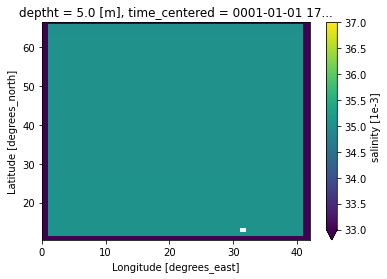

In [163]:
T2.soce.isel(deptht=0, time_counter=-5).plot(x='nav_lon_grid_T', y='nav_lat_grid_T', vmin=33, vmax=37)

## Zonal velocity at the surface

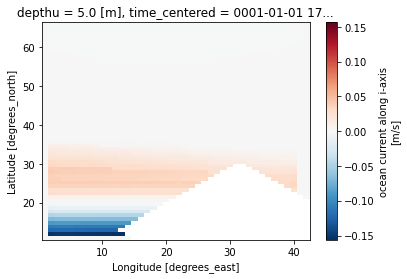

In [158]:
U2.uoce.isel(depthu=0, time_counter=-5).plot(x='nav_lon', y='nav_lat')

## Runtime

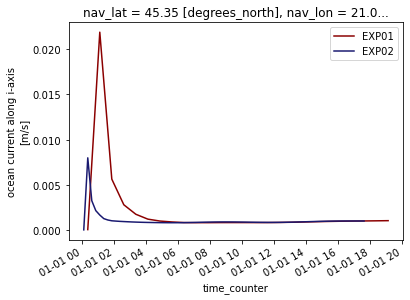

In [136]:
U1.uoce.isel(depthu=0, x=20, y=40).plot(x='time_counter', color='darkred', label='EXP01')
U2.uoce.isel(depthu=0, x=20, y=40).plot(x='time_counter', color='midnightblue', label='EXP02')
plt.legend()


# **EXP03: Decreased wind forcing x0.5**

In [90]:
U3       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP03/BASIN_grid_U.nc")
T3       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP03/BASIN_grid_T.nc")

In [91]:
T3 = clean_coords(T3, 2000)
U3 = clean_coords(U3, 2000)

## Salinity at the surface

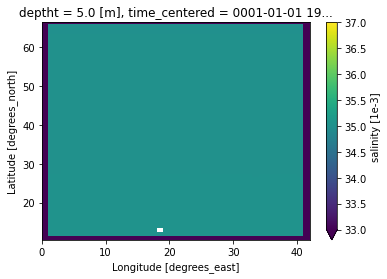

In [138]:
T3.soce.isel(deptht=0, time_counter=-2).plot(x='nav_lon_grid_T', y='nav_lat_grid_T', vmin=33, vmax=37)

## Zonal velocity at the surface

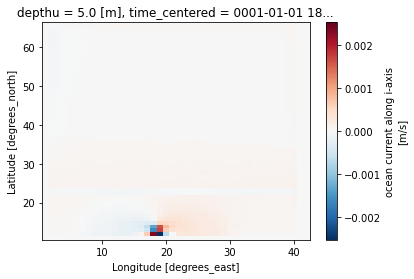

In [150]:
U3.uoce.isel(depthu=0, time_counter=-3).plot(x='nav_lon', y='nav_lat')

## Runtime

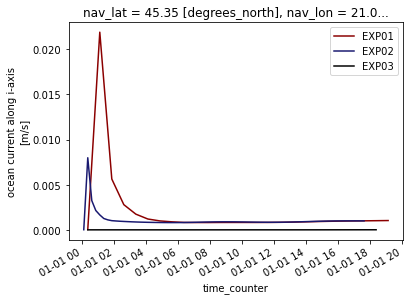

In [140]:
U1.uoce.isel(depthu=0, x=20, y=40).plot(x='time_counter', color='darkred', label='EXP01')
U2.uoce.isel(depthu=0, x=20, y=40).plot(x='time_counter', color='midnightblue', label='EXP02')
U3.uoce.isel(depthu=0, x=20, y=40).plot(x='time_counter', color='black', label='EXP03')
plt.legend()


# **EXP04: Include southern hemisphere**

In [108]:
U4       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP04/BASIN_grid_U.nc")
T4       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP04/BASIN_grid_T.nc")
mask4    = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP04/mesh_mask.nc")

In [109]:
T4 = clean_coords(T4, 2000)
U4 = clean_coords(U4, 2000)
mask4 = clean_coords(mask4, 2000)

## Bathymetry

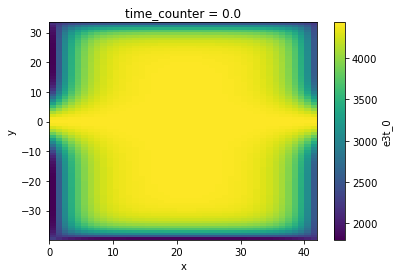

In [110]:
mask4.e3t_0.sum(dim='nav_lev').plot(x='x', y='y')

## Salinity at the surface

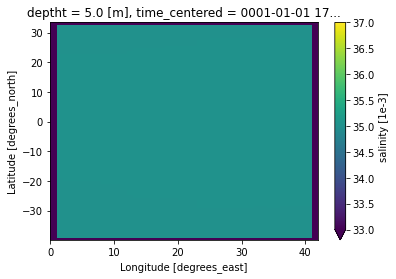

In [175]:
T4.soce.isel(deptht=0, time_counter=-1).plot(x='nav_lon_grid_T', y='nav_lat_grid_T', vmin=33, vmax=37)

## Zonal velocity at the surface

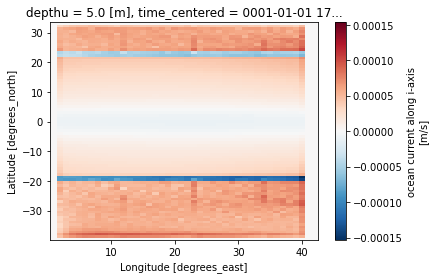

In [165]:
U4.uoce.isel(depthu=0, time_counter=-1).plot(x='nav_lon', y='nav_lat')


# **EXP05: Uniform zonal wind forcing**

In [142]:
U5       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP05/BASIN_grid_U.nc")
T5       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP05/BASIN_grid_T.nc")

In [143]:
T5 = clean_coords(T5, 2000)
U5 = clean_coords(U5, 2000)

## Zonal velocity at the surface

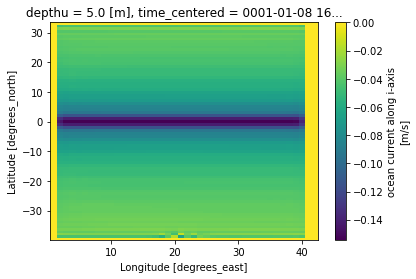

In [194]:
U5.uoce.isel(depthu=0, time_counter=-1).plot(x='nav_lon', y='nav_lat')

## Salinity at the surface

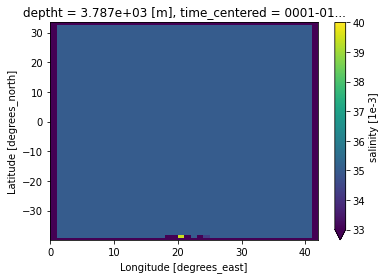

In [184]:
T5.soce.isel(deptht=-2, time_counter=-1).plot(x='nav_lon_grid_T', y='nav_lat_grid_T', vmin=33, vmax=40)


# **EXP06: Change to TEOS10**

In [169]:
U6       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP06/BASIN_grid_U.nc")
T6       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP06/BASIN_grid_T.nc")

In [170]:
T6 = clean_coords(T6, 2000)
U6 = clean_coords(U6, 2000)

## Salinity at the surface

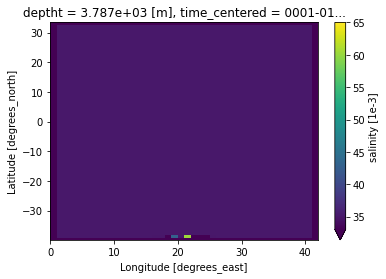

In [190]:
T6.soce.isel(deptht=-2, time_counter=-1).plot(x='nav_lon_grid_T', y='nav_lat_grid_T', vmin=33, vmax=65)

## Zonal velocity at the surface

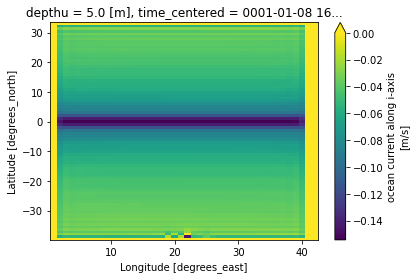

In [199]:
U6.uoce.isel(depthu=0, time_counter=-1).plot(x='nav_lon', y='nav_lat', cmap='viridis', vmax=0)


# **EXP07: No flattening of the bathymetry at the equator**

In [202]:
U7       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP07/BASIN_grid_U.nc")
T7       = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP07/BASIN_grid_T.nc")
mask7    = xr.load_dataset("/home/dkamm/NEMOGCM/tests/BASIN2/EXP07/mesh_mask.nc")

In [203]:
T7 = clean_coords(T7, 2000)
U7 = clean_coords(U7, 2000)
mask7 = clean_coords(mask7, 2000)

## Bathymetry

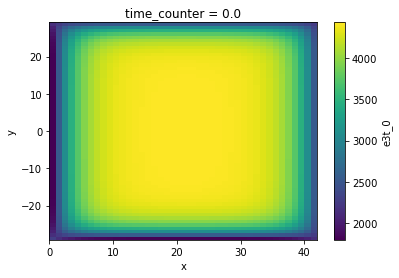

In [207]:
mask7.e3t_0.sum(dim='nav_lev').plot(x='x', y='y')

## Salinity at the surface

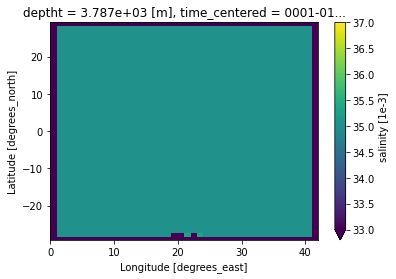

In [205]:
T7.soce.isel(deptht=-2, time_counter=-1).plot(x='nav_lon_grid_T', y='nav_lat_grid_T', vmin=33, vmax=37)

## Zonal velocity at the surface

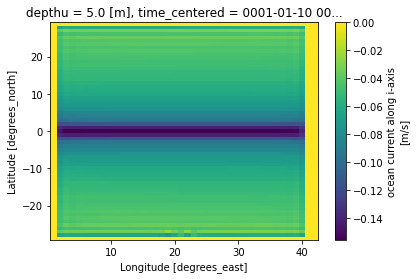

In [206]:
U7.uoce.isel(depthu=0, time_counter=-1).plot(x='nav_lon', y='nav_lat', cmap='viridis', vmax=0)